3.Competitor Analysis

      competitor  frequency_of_posts        likes    comments      shares  \
0         Chanel                  30  2574.266667  262.033333  107.566667   
1         Levi's                  30  2160.933333  300.233333   93.266667   
2  Louis Vuitton                  30  2362.566667  239.566667  111.666667   

   total_engagement  engagement_rate  
0       2943.866667         1.203866  
1       2554.433333         1.588234  
2       2713.800000         1.298279  


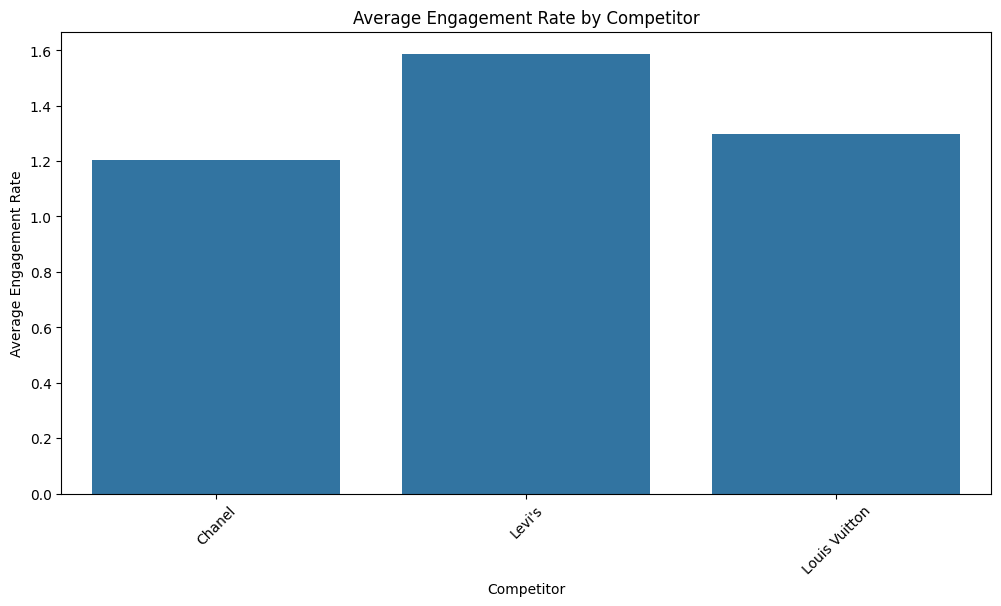

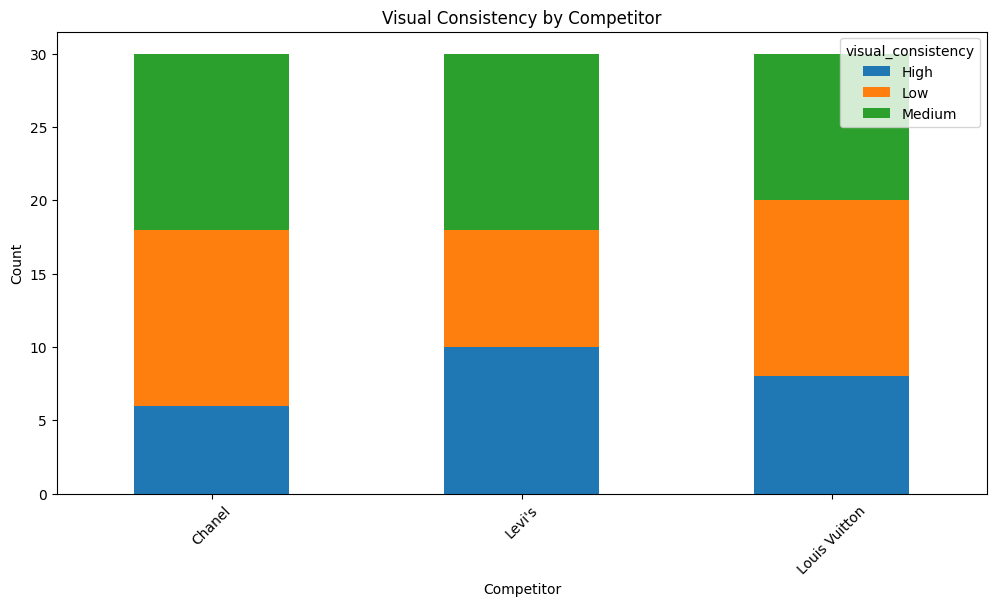

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/fashion_competitor_data_updated.csv')

# Calculate engagement metrics
data['total_engagement'] = data['likes'] + data['comments'] + data['shares']
data['engagement_rate'] = data['total_engagement'] / (data['likes'] + 1)  # Avoid division by zero

# Group by competitor and calculate average metrics
competitor_summary = data.groupby('competitor').agg({
    'post_date': 'count',  # Frequency of posts
    'likes': 'mean',
    'comments': 'mean',
    'shares': 'mean',
    'total_engagement': 'mean',
    'engagement_rate': 'mean',
}).reset_index()

# Rename the post_date column to frequency
competitor_summary.rename(columns={'post_date': 'frequency_of_posts'}, inplace=True)

# Print the competitor summary
print(competitor_summary)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='competitor', y='engagement_rate', data=competitor_summary)
plt.title('Average Engagement Rate by Competitor')
plt.xlabel('Competitor')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.show()

# Visual consistency analysis
visual_consistency_summary = data.groupby('competitor')['visual_consistency'].value_counts().unstack().fillna(0)
visual_consistency_summary.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Visual Consistency by Competitor')
plt.xlabel('Competitor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()